Loading the required libraries and dataset

In [30]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use("ggplot")

#Load the data
df = pd.read_csv("/Users/christine/Desktop/group_project/pharmacy_tx.csv")

df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


Basic information (counts, null data, etc)

In [33]:
#What are the identifiers

df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


In [18]:
#Which identifiers have null data

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
group,3909025,0.281018
pcn,3626961,0.260740
tx_date,0,0.000000
pharmacy,0,0.000000
diagnosis,0,0.000000
drug,0,0.000000
bin,0,0.000000
rejected,0,0.000000
patient_pay,0,0.000000


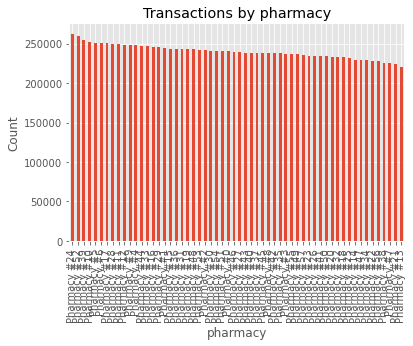

In [3]:
#Transactions by pharmacy -- seems to have even coverage

df.pharmacy.value_counts().plot(kind="bar")
plt.title("Transactions by pharmacy")
plt.xlabel("pharmacy")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

#df.pharmacy.value_counts()

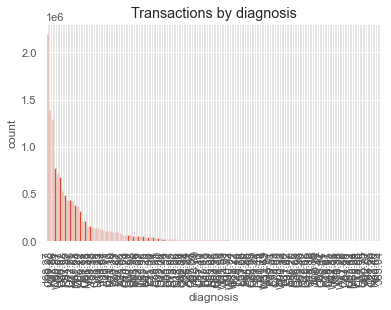

I68.27    2193157
G99.93    1386006
K32.86    1292235
Q85.91     775390
W50.87     718798
           ...   
Y08.66         24
G27.20         24
N33.46         12
X00.63         12
J65.04         12
Name: diagnosis, Length: 133, dtype: int64

In [32]:
#Transactions by diagnosis

df.diagnosis.value_counts().plot(kind="bar")
plt.title("Transactions by diagnosis")
plt.xlabel("diagnosis")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

df.diagnosis.value_counts()


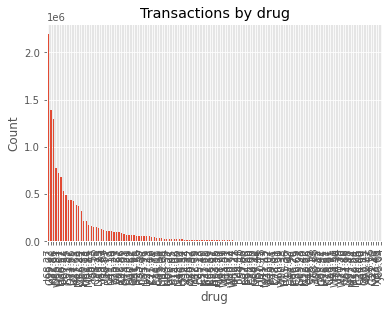

generic prazinib        865905
branded prazinib        845852
branded mule            543372
branded hidizuzunib     484868
generic rulfalol        360884
                         ...  
branded sizubesin         8130
branded lehydrome         2561
generic gohevitravir      2303
branded gohevitravir      1811
branded nenizevir         1112
Name: drug, Length: 114, dtype: int64

In [5]:
#Transactions by drug

## look into branded vs non-branded medication across pharmacies and bins

df.diagnosis.value_counts().plot(kind="bar")
plt.title("Transactions by drug")
plt.xlabel("drug")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

df.drug.value_counts()

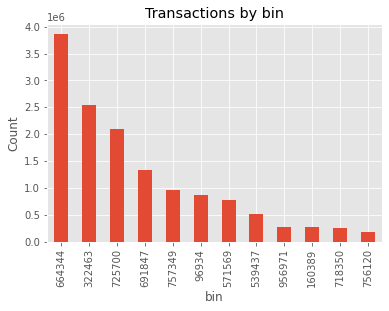

In [6]:
#Transactions by bin

df.bin.value_counts().plot(kind="bar")
plt.title("Transactions by bin")
plt.xlabel("bin")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

#df.bin.value_counts()

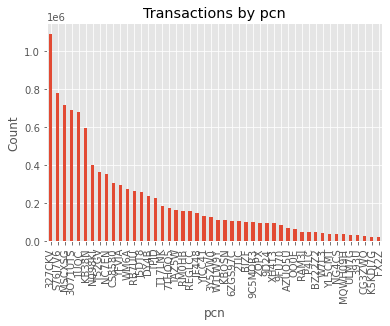

In [7]:
#Transactions by pcn

df.pcn.value_counts().plot(kind="bar")
plt.title("Transactions by pcn")
plt.xlabel("pcn")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

#df.pcn.value_counts()

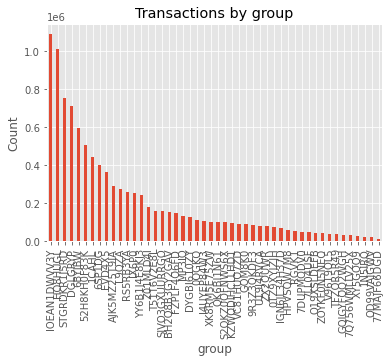

In [8]:
#Transactions by group

df.group.value_counts().plot(kind="bar")
plt.title("Transactions by group")
plt.xlabel("group")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

#df.group.value_counts()

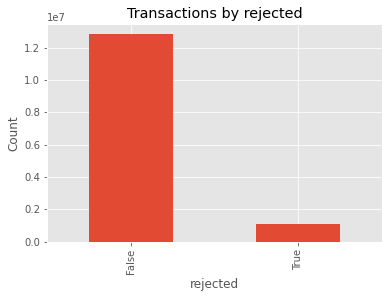

In [9]:
#Transactions by rejected

df.rejected.value_counts().plot(kind="bar")
plt.title("Transactions by rejected")
plt.xlabel("rejected")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

#df.group.value_counts()

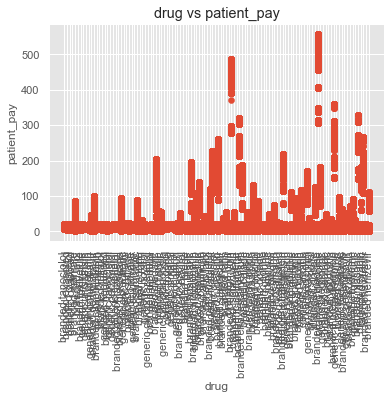

In [38]:
#Drug vs patient_pay

#There are some big breaks between patient pay -- where is it from?

plt.scatter(data=df,x="drug",y="patient_pay")
plt.title("drug vs patient_pay")
plt.ylabel("patient_pay")
plt.xlabel("drug")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

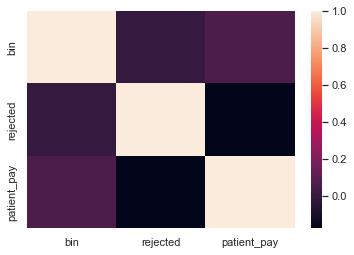

In [25]:
sns.heatmap(df.corr())

In [36]:
df.groupby(by='drug')['patient_pay'].mean()

drug
branded antimab            18.559365
branded bovirol            12.880017
branded brede              13.660646
branded choxestamenium     85.064698
branded cibroniudosin      12.885292
                             ...    
generic tanoclolol          7.057600
generic thiostasteglume    13.654865
generic todiadianic        30.306032
generic tovane             10.380411
generic vocopirin          12.922301
Name: patient_pay, Length: 114, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


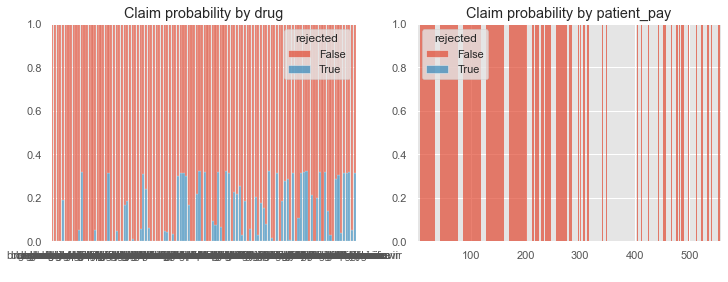

In [43]:
#Probability of rejection based on drug and pay

#Look into the claim probability based on branded and generic.

fig, axes = plt.subplots(1,2,figsize=(12,4))

for i,col in enumerate(["drug","patient_pay"]):
    sns.histplot(df, ax=axes[i],x=col, hue="rejected",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim probability by "+ col,ylabel=" ",xlabel=" ")